In [29]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Load the trained model 
model = torch.load('./NewDoorsOutput/weights.pt')
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [31]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('./NewDoorsOutput/log.csv')

### Training and testing loss, f1_score and auroc values for the model trained on the CrackForest dataset

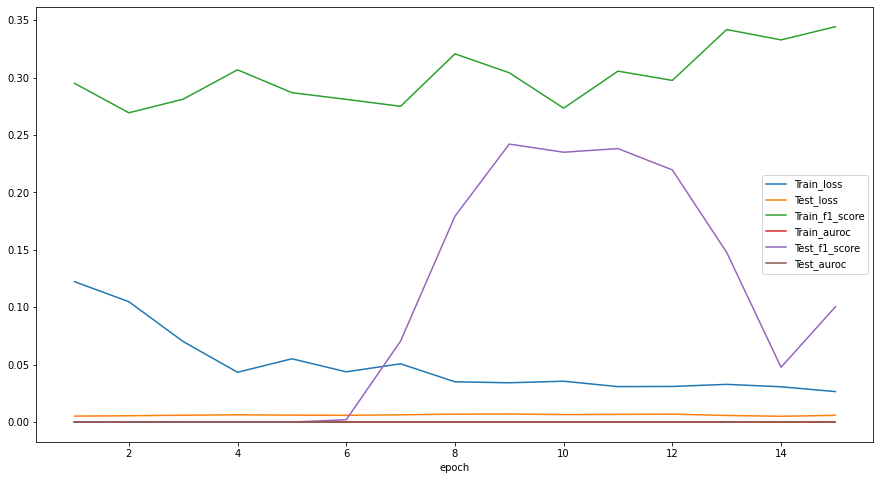

In [10]:
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(15,8));

In [32]:
print(df[['Train_auroc','Test_auroc']].max())

Train_auroc    0.0
Test_auroc     0.0
dtype: float64


### Sample Prediction

In [33]:
ino = 2
# Read  a sample image and mask from the data-set
# img = cv2.imread('./DoorsMimicClosed/Images/Door0700.png').transpose(1,2,0).reshape(1,3,640,480)
img = cv2.imread('./DoorsSmall/Images/Door0025.png').transpose(1,2,0).reshape(1,3,640,480)
mask = cv2.imread('./DoorsSmall/Masks/Door0025.png')
# mask = cv2.imread('./DoorsMimicClosed/Masks/Door0700.png')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255) #/255 makes array of numbers from 0 to 1

(array([  1192.,  14874.,  76893., 112260.,  68294.,  23977.,   7998.,
          1098.,    397.,    217.]),
 array([-0.01561408,  0.00150621,  0.0186265 ,  0.03574679,  0.05286708,
         0.06998737,  0.08710766,  0.10422795,  0.12134824,  0.13846853,
         0.15558882], dtype=float32),
 <BarContainer object of 10 artists>)

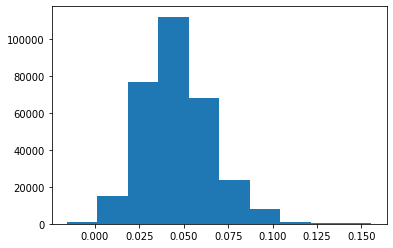

In [34]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

(-0.5, 479.5, 639.5, -0.5)

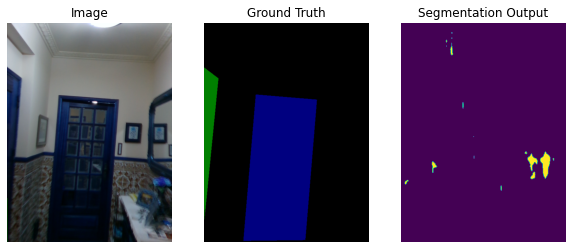

In [40]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10))

plt.subplot(131)
plt.imshow(cv2.imread('./DoorsSmall/Images/Door0025.png'))
plt.title('Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(mask)
plt.title('Ground Truth')
plt.axis('off')

plt.subplot(133)
plt.imshow(a['out'].cpu().detach().numpy()[0][0]> 0.1)
plt.title('Segmentation Output')
plt.axis('off')

# plt.savefig('./DoorsMediumExp/SegmentationOutput.png',bbox_inches='tight')